<img src="./julia_logo.png" align="center" width="400"/>

System information (for reproducibility)

In [1]:
versioninfo()

Julia Version 1.11.4
Commit 8561cc3d68d (2025-03-10 11:36 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin24.0.0)
  CPU: 12 × Apple M2 Max
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, apple-m2)
Threads: 8 default, 0 interactive, 4 GC (on 8 virtual cores)
Environment:
  JULIA_NUM_THREADS = 8
  JULIA_EDITOR = code


Load packages:

In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-257/2025spring/slides/03-juliaintro`


Status `~/Documents/github.com/ucla-biostat-257/2025spring/slides/03-juliaintro/Project.toml`
  [6e4b80f9] BenchmarkTools v1.6.0
  [31c24e10] Distributions v0.25.118
  [6f49c342] RCall v0.14.6
  [37e2e46d] LinearAlgebra v1.11.0
  [9abbd945] Profile v1.11.0
  [2f01184e] SparseArrays v1.11.0


In [3]:
using BenchmarkTools, Distributions, RCall
using LinearAlgebra, Profile, SparseArrays

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.11.4 (as of Apr 1, 2025)

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:  
    
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  

4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.11) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  

1. `exit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google.

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(π)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Many choices: VS Code, Vim, ...

* For dynamic document, e.g., homework, I recommend [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/) or VS Code (with Jupyter extension). 

* For extensive Julia coding, myself has been happily using [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.11) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.11) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.11) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

In [4]:
readdir(Sys.islinux() ? ENV["JULIA_PATH"] * "/pkg/packages" : ENV["HOME"] * "/.julia/packages")

803-element Vector{String}:
 "ADTypes"
 "AMD"
 "ANSIColoredPrinters"
 "ASL_jll"
 "AbstractAlgebra"
 "AbstractFFTs"
 "AbstractLattices"
 "AbstractTrees"
 "Accessors"
 "AccurateArithmetic"
 "Adapt"
 "AdaptivePredicates"
 "AlgebraicMultigrid"
 ⋮
 "libinput_jll"
 "libpng_jll"
 "libsass_jll"
 "libsixel_jll"
 "libsodium_jll"
 "libvorbis_jll"
 "libwebp_jll"
 "mtdev_jll"
 "oneTBB_jll"
 "x264_jll"
 "x265_jll"
 "xkbcommon_jll"

* Directory of a specific package can be queried by `pathof()`:

In [5]:
pathof(Distributions)

"/Users/huazhou/.julia/packages/Distributions/fi8Qd/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

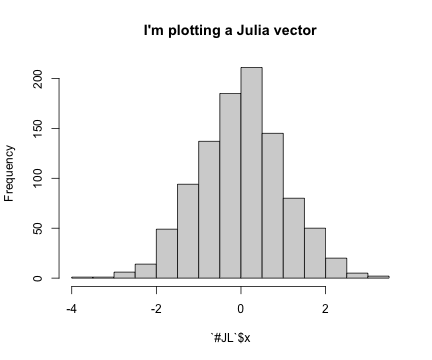

In [6]:
# x is in Julia workspace
x = randn(1000)

# $ is the interpolation operator
R"""
hist($x, main = "I'm plotting a Julia vector")
""";

┌ Warning: RCall.jl: Warning: `qplot()` was deprecated in ggplot2 3.4.0.
└ @ RCall ~/.julia/packages/RCall/0ggIQ/src/io.jl:172
┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall ~/.julia/packages/RCall/0ggIQ/src/io.jl:172


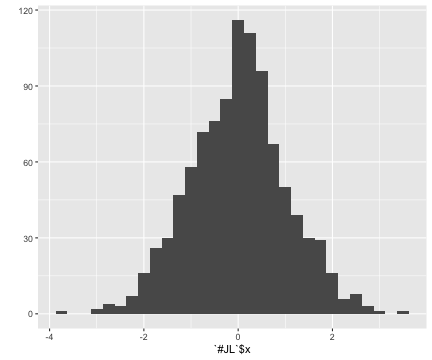

RObject{VecSxp}


In [7]:
R"""
library(ggplot2)

qplot($x)
"""

In [8]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1]  0.7918257  0.2564399  0.3989598 -1.3428199  1.0601808  0.3390756
 [7] -0.4230867  0.3317554  0.8377051 -1.5231921


In [9]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
  0.7918257099372811
  0.25643986812013725
  0.39895983958792663
 -1.3428198939562592
  1.0601808262352261
  0.33907555912946385
 -0.4230866721228354
  0.3317553994138106
  0.8377050969608829
 -1.5231920581399474

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`JuliaCall`](https://non-contradiction.github.io/JuliaCall//index.html) package.

## Some basic Julia code

In [10]:
# an integer, same as int in R
y = 1

1

In [11]:
# query type of a Julia object
typeof(y)

Int64

In [12]:
# a Float64 number, same as double in R
y = 1.0

1.0

In [13]:
typeof(y) 

Float64

In [14]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [15]:
typeof(π)

Irrational{:π}

In [16]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [17]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0
😽 + 1

6.0

In [18]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

For a list of unicode symbols that can be tab-completed, see <https://docs.julialang.org/en/v1/manual/unicode-input/>. Or in the help mode, type `?` followed by the unicode symbol you want to input.

In [19]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [21]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [22]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [23]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Matrix{Float64}:
 5.0e-324  3.5e-323  6.0e-323
 1.0e-323  4.0e-323  7.0e-323
 1.5e-323  4.4e-323  6.4e-323
 2.0e-323  5.0e-323  3.0e-323
 2.5e-323  5.4e-323  2.12366e-314

In [24]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [25]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [26]:
# rational number
a = 3//5

3//5

In [27]:
typeof(a)

Rational{Int64}

In [28]:
b = 3//7

3//7

In [29]:
a + b

36//35

In [30]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.75363   0.534256   0.0716634
 0.583245  0.229855   0.282277
 0.398684  0.0229633  0.00679805
 0.339542  0.615249   0.289005
 0.804634  0.308891   0.336691

In [31]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.5293  0.0337  0.3115
 0.506   0.3857  0.2969
 0.2339  0.4277  0.9165
 0.7397  0.3872  0.4097
 0.1211  0.4092  0.006348

In [32]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 2  2  2
 4  5  1
 1  2  2
 1  2  2
 2  2  1

In [33]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.894102    1.29767   2.89418
 -0.0195624   2.0082    0.958971
  0.356493   -1.2539    0.265182
  1.47527     2.40504   2.62121
 -1.73591     0.558897  0.30584

In [34]:
# range
1:10

1:10

In [35]:
typeof(1:10)

UnitRange{Int64}

In [36]:
1:2:10

1:2:9

In [37]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [38]:
# integers 1-10
x = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [39]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [40]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [41]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [42]:
# syntactically same as above
Float64.(1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Matrices and vectors

### Dimensions

In [43]:
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.306455  -0.123837  -0.879429
  0.690899  -0.528395  -1.47018
 -0.656257  -0.462483  -0.391235
 -0.47952   -0.828275  -0.128083
  1.62894    0.279891  -0.610477

In [44]:
size(x)

(5, 3)

In [45]:
size(x, 1) # nrow() in R

5

In [46]:
size(x, 2) # ncol() in R

3

In [47]:
# total number of elements
length(x)

15

### Indexing

In [48]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5)

5×5 Matrix{Float64}:
 -1.00829    1.42918   -0.876112   0.674993   0.340248
 -0.493246   0.193201   0.431973  -0.114723  -0.525402
  0.911637  -0.411778   1.52413    0.62592    0.585986
  1.33735    0.9701     0.686554  -0.532545   0.933378
 -1.45963   -0.234725  -0.560424  -0.325453  -1.1651

In [49]:
# first column
x[:, 1]

5-element Vector{Float64}:
 -1.0082878642628228
 -0.49324649347079297
  0.9116368000184132
  1.3373534865879368
 -1.4596334132489657

In [50]:
# first row
x[1, :]

5-element Vector{Float64}:
 -1.0082878642628228
  1.4291812336443466
 -0.8761116073704214
  0.6749926102770285
  0.34024791924568143

In [51]:
# sub-array
x[1:2, 2:3]

2×2 Matrix{Float64}:
 1.42918   -0.876112
 0.193201   0.431973

In [52]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

2×2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 1.42918   -0.876112
 0.193201   0.431973

In [53]:
# same as
@views z = x[1:2, 2:3]

2×2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 1.42918   -0.876112
 0.193201   0.431973

In [54]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

5×5 Matrix{Float64}:
 -1.00829    1.42918   -0.876112   0.674993   0.340248
 -0.493246   0.193201   0.0       -0.114723  -0.525402
  0.911637  -0.411778   1.52413    0.62592    0.585986
  1.33735    0.9701     0.686554  -0.532545   0.933378
 -1.45963   -0.234725  -0.560424  -0.325453  -1.1651

In [55]:
# y points to same data as x
y = x

5×5 Matrix{Float64}:
 -1.00829    1.42918   -0.876112   0.674993   0.340248
 -0.493246   0.193201   0.0       -0.114723  -0.525402
  0.911637  -0.411778   1.52413    0.62592    0.585986
  1.33735    0.9701     0.686554  -0.532545   0.933378
 -1.45963   -0.234725  -0.560424  -0.325453  -1.1651

In [56]:
# x and y point to same data
pointer(x), pointer(y)

(Ptr{Float64} @0x000000031c8c5de0, Ptr{Float64} @0x000000031c8c5de0)

In [57]:
# changing y also changes x
y[:, 1] .= 0
x

5×5 Matrix{Float64}:
 0.0   1.42918   -0.876112   0.674993   0.340248
 0.0   0.193201   0.0       -0.114723  -0.525402
 0.0  -0.411778   1.52413    0.62592    0.585986
 0.0   0.9701     0.686554  -0.532545   0.933378
 0.0  -0.234725  -0.560424  -0.325453  -1.1651

In [58]:
# create a new copy of data
z = copy(x)

5×5 Matrix{Float64}:
 0.0   1.42918   -0.876112   0.674993   0.340248
 0.0   0.193201   0.0       -0.114723  -0.525402
 0.0  -0.411778   1.52413    0.62592    0.585986
 0.0   0.9701     0.686554  -0.532545   0.933378
 0.0  -0.234725  -0.560424  -0.325453  -1.1651

In [59]:
pointer(x), pointer(z)

(Ptr{Float64} @0x000000031c8c5de0, Ptr{Float64} @0x000000031becaf60)

### Concatenate matrices

In [60]:
# 3-by-1 vector
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [61]:
# 1-by-3 array
[1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [62]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

([0.2242823393836569 -1.7138037049828658 -0.036978353294990864; -0.4413949532639589 0.19195322892694416 -1.26362181131408; … ; 0.5386623597183907 1.4594883102361922 -0.7917189369857376; 2.0525393640088603 0.6183464993115776 0.7408534886159363], [-0.9284152329267081 -1.456052990204398; -0.42934597094747884 -0.693532766828425; … ; -1.2146125828066 0.5135614995585775; 2.029804675471515 0.7892250445238976], [-0.8143222322254223 0.1694542286595268 … -1.5184614727204506 -1.6207032281387632; -0.8623191397127847 0.3417356042401175 … -0.5664049163725529 -0.40021344368651435; -0.16774627915064186 -0.08568402167112428 … 0.2718885292706844 -0.7326055460893308])

In [63]:
[x y] # 5-by-5 matrix

5×5 Matrix{Float64}:
  0.224282  -1.7138    -0.0369784  -0.928415  -1.45605
 -0.441395   0.191953  -1.26362    -0.429346  -0.693533
 -0.108974  -1.79743   -0.968297    0.204003   0.535644
  0.538662   1.45949   -0.791719   -1.21461    0.513561
  2.05254    0.618346   0.740853    2.0298     0.789225

In [64]:
[x y; z] # 8-by-5 matrix

8×5 Matrix{Float64}:
  0.224282  -1.7138    -0.0369784  -0.928415  -1.45605
 -0.441395   0.191953  -1.26362    -0.429346  -0.693533
 -0.108974  -1.79743   -0.968297    0.204003   0.535644
  0.538662   1.45949   -0.791719   -1.21461    0.513561
  2.05254    0.618346   0.740853    2.0298     0.789225
 -0.814322   0.169454   1.42224    -1.51846   -1.6207
 -0.862319   0.341736   0.46134    -0.566405  -0.400213
 -0.167746  -0.085684  -1.85986     0.271889  -0.732606

### Dot operation (broadcasting)

Dot operation in Julia is elementwise operation, similar to Matlab.

In [65]:
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.076522  -0.917166   -0.200622
 -0.88522   -0.976642   -0.669177
 -1.5188     0.0918114  -1.50438
  2.64529    0.790842   -1.28675
  0.793202   1.03624    -0.235334

In [66]:
y = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [67]:
x .* y # same x * y in R

5×3 Matrix{Float64}:
  0.076522  -0.917166   -0.200622
 -0.88522   -0.976642   -0.669177
 -1.5188     0.0918114  -1.50438
  2.64529    0.790842   -1.28675
  0.793202   1.03624    -0.235334

In [68]:
x .^ (-2)

5×3 Matrix{Float64}:
 170.776       1.18879   24.8451
   1.27614     1.0484     2.23315
   0.433508  118.633      0.441863
   0.142906    1.5989     0.603964
   1.5894      0.931281  18.0564

In [69]:
sin.(x)

5×3 Matrix{Float64}:
  0.0764473  -0.793881   -0.199279
 -0.774054   -0.828622   -0.62034
 -0.998649    0.0916825  -0.997795
  0.476174    0.710946   -0.95993
  0.712603    0.860494   -0.233168

### Basic linear algebra

In [70]:
x = randn(5)

5-element Vector{Float64}:
 -0.6160722689186728
 -0.7124082391722473
 -0.12500327594792363
  0.4206430367448013
 -0.30667277300118306

In [71]:
# vector L2 norm
norm(x)

1.0833674874348682

In [72]:
# same as
sqrt(sum(abs2, x))

1.0833674874348682

In [73]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

1.0290691640435927

In [74]:
# same as
x'y

1.0290691640435927

In [75]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5×2 Matrix{Float64}:
  1.37573   -1.70603
  0.25978   -0.0327548
 -1.32104    0.95593
  0.597036   0.564457
 -1.80454   -0.259589

In [76]:
x = randn(3, 3)

3×3 Matrix{Float64}:
 2.17345    0.436274  -0.114771
 1.85661    0.968813   0.42073
 0.187513  -1.30033   -1.374

In [77]:
# conjugate transpose
x'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
  2.17345   1.85661    0.187513
  0.436274  0.968813  -1.30033
 -0.114771  0.42073   -1.374

In [78]:
b = rand(3)
x'b # same as x' * b

3-element Vector{Float64}:
  2.027465166143618
 -0.4784022660861423
 -1.0218808683840002

In [79]:
# trace
tr(x)

1.7682692018500024

In [80]:
det(x)

-0.258841686498328

In [81]:
rank(x)

3

### Sparse matrices

In [82]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64, Int64} with 7 stored entries:
  ⋅          ⋅         ⋅     ⋅        …   ⋅     ⋅        ⋅    ⋅ 
 0.603112    ⋅         ⋅     ⋅            ⋅   -1.82107   ⋅    ⋅ 
  ⋅        -0.372368   ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅   -0.345201  …   ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅   0.685263

In [83]:
# dump() in Julia is like str() in R
dump(X)

SparseMatrixCSC{Float64, Int64}
  m: Int64 10
  n: Int64 10
  colptr: Array{Int64}((11,)) [1, 2, 3, 3, 4, 5, 6, 6, 7, 7, 8]
  rowval: Array{Int64}((7,)) [2, 3, 6, 2, 7, 2, 10]
  nzval: Array{Float64}((7,)) [0.6031118284436581, -0.37236769835979655, -0.3452007407460549, 0.43453625457595846, -1.6918818826031499, -1.8210705359052912, 0.685263323700436]


In [84]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

10×10 Matrix{Float64}:
 0.0        0.0       0.0   0.0       …  0.0   0.0      0.0  0.0
 0.603112   0.0       0.0   0.0          0.0  -1.82107  0.0  0.0
 0.0       -0.372368  0.0   0.0          0.0   0.0      0.0  0.0
 0.0        0.0       0.0   0.0          0.0   0.0      0.0  0.0
 0.0        0.0       0.0   0.0          0.0   0.0      0.0  0.0
 0.0        0.0       0.0  -0.345201  …  0.0   0.0      0.0  0.0
 0.0        0.0       0.0   0.0          0.0   0.0      0.0  0.0
 0.0        0.0       0.0   0.0          0.0   0.0      0.0  0.0
 0.0        0.0       0.0   0.0          0.0   0.0      0.0  0.0
 0.0        0.0       0.0   0.0          0.0   0.0      0.0  0.685263

In [85]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64, Int64} with 7 stored entries:
  ⋅          ⋅         ⋅     ⋅        …   ⋅     ⋅        ⋅    ⋅ 
 0.603112    ⋅         ⋅     ⋅            ⋅   -1.82107   ⋅    ⋅ 
  ⋅        -0.372368   ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅   -0.345201  …   ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅    ⋅ 
  ⋅          ⋅         ⋅     ⋅            ⋅     ⋅        ⋅   0.685263

In [86]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

10-element Vector{Float64}:
  0.0
 -0.7834224528856748
 -0.37236769835979655
  0.0
  0.0
 -0.3452007407460549
 -1.6918818826031499
  0.0
  0.0
  0.685263323700436

In [87]:
# many functions apply to sparse matrices as well
sum(X)

-2.5076094508942397

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Scalar functions can be vectorized using the Dot syntax:

In [88]:
# defined for scalar
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5×3 Matrix{Float64}:
  0.0535532   0.0139853   0.175438
  0.00471035  0.220449   -0.757072
  0.244413    0.0376385  -0.529979
  0.0718408   0.904107    0.994178
 -0.632933    0.215007    9.49316e-5

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [89]:
map(x -> sin(x^2), x)

5×3 Matrix{Float64}:
  0.0535532   0.0139853   0.175438
  0.00471035  0.220449   -0.757072
  0.244413    0.0376385  -0.529979
  0.0718408   0.904107    0.994178
 -0.632933    0.215007    9.49316e-5

In [90]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

5×3 Matrix{Float64}:
  0.0535532   0.0139853   0.175438
  0.00471035  0.220449   -0.757072
  0.244413    0.0376385  -0.529979
  0.0718408   0.904107    0.994178
 -0.632933    0.215007    9.49316e-5

In [91]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

1.0154313481849793

In [92]:
# same as
sum(x -> sin(x^2), x)

1.0154313481849793

* List **comprehension**

In [93]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

5×3 Matrix{Float64}:
  0.14112   -0.756802  -0.958924
 -0.958924  -0.279415   0.656987
  0.656987   0.989358   0.412118
  0.412118  -0.544021  -0.99999
 -0.99999   -0.536573   0.420167

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="800" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [94]:
# 1.0: double precision, 1: 64-bit integer
typeof(1.0), typeof(1)

(Float64, Int64)

In [95]:
supertype(Float64)

AbstractFloat

In [96]:
subtypes(AbstractFloat)

5-element Vector{Any}:
 BigFloat
 Core.BFloat16
 Float16
 Float32
 Float64

In [97]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

In [98]:
# On 64bit machine, Int == Int64
Int == Int64

true

In [99]:
# convert to Float64
convert(Float64, 1)

1.0

In [100]:
# same as casting
Float64(1)

1.0

In [101]:
# Float32 vector
x = randn(Float32, 5)

5-element Vector{Float32}:
  0.75787747
  0.51667124
 -1.8232445
  6.82108f-5
  1.9995484

In [102]:
# convert to Float64
convert(Vector{Float64}, x)

5-element Vector{Float64}:
  0.7578774690628052
  0.5166712403297424
 -1.8232444524765015
  6.821080023655668e-5
  1.9995484352111816

In [103]:
# same as broadcasting (dot operatation)
Float64.(x)

5-element Vector{Float64}:
  0.7578774690628052
  0.5166712403297424
 -1.8232444524765015
  6.821080023655668e-5
  1.9995484352111816

In [104]:
# convert Float64 to Int64
convert(Int, 1.0)

1

In [105]:
convert(Int, 1.5) # should use round(1.5)

LoadError: InexactError: Int64(1.5)

In [106]:
round(Int, 1.5)

2

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [107]:
g(x) = x + x

g (generic function with 1 method)

In [108]:
g(1.5)

3.0

This definition is too broad, since some things, e.g., strings, can't be added 

In [110]:
g("hello world")

LoadError: MethodError: no method matching +(::String, ::String)
The function `+` exists, but no method is defined for this combination of argument types.
String concatenation is performed with [36m*[39m (See also: https://docs.julialang.org/en/v1/manual/strings/#man-concatenation).

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:596[24m[39m
[0m  +([91m::Bool[39m, [91m::Complex{Bool}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:308[24m[39m
[0m  +([91m::Bool[39m, [91m::Bool[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mbool.jl:166[24m[39m
[0m  ...


* This definition is correct but too restrictive, since any `Number` can be added.

In [111]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This definition will automatically work on the entire type tree above!

In [112]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [113]:
methods(g)

# 3 methods for generic function "g" from Main:
 [1] g(x::Float64)
     @ In[111]:1
 [2] g(x::Number)
     @ In[112]:1
 [3] g(x)
     @ In[107]:1

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [114]:
# an Int64 input
@which g(1)

g(x::Number)
     @ Main In[112]:1

In [115]:
# a Vector{Float64} input
@which g(randn(5))

g(x)
     @ Main In[107]:1

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://www.youtube.com/watch?v=szE4txAD8mk).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM compiler to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [116]:
g(2), g(2.0)

(4, 4.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [117]:
@code_lowered g(2)

CodeInfo(
1 ─ %1 = x + x
└──      return %1
)

**Step 2**: Type inference according to input type.

In [118]:
# type inference for integer input
@code_warntype g(2)

MethodInstance for g(::Int64)
  from g(x::Number) @ Main In[112]:1
Arguments
  #self#::Core.Const(Main.g)
  x::Int64
Body::Int64
1 ─ %1 = (x + x)::Int64
└──      return %1



In [119]:
# type inference for Float64 input
@code_warntype g(2.0)

MethodInstance for g(::Float64)
  from g(x::Float64) @ Main In[111]:1
Arguments
  #self#::Core.Const(Main.g)
  x::Float64
Body::Float64
1 ─ %1 = (x + x)::Float64
└──      return %1



**Step 3**: Compile into **LLVM bitcode** (equivalent of R bytecode generated by the `compiler` package).

In [120]:
# LLVM bitcode for integer input
@code_llvm g(2)

; Function Signature: g(Int64)
;  @ In[112]:1 within `g`
define i64 @julia_g_29002(i64 signext %"x::Int64") #0 {
top:
; ┌ @ int.jl:87 within `+`
   %0 = shl i64 %"x::Int64", 1
   ret i64 %0
; └
}


In [121]:
# LLVM bitcode for Float64 input
@code_llvm g(2.0)

; Function Signature: g(Float64)
;  @ In[111]:1 within `g`
define double @julia_g_29080(double %"x::Float64") #0 {
top:
; ┌ @ float.jl:491 within `+`
   %0 = fadd double %"x::Float64", %"x::Float64"
   ret double %0
; └
}


We didn't provide a type annotation. But different LLVM bitcodes were generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.

In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simply shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [122]:
# Assembly code for integer input
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	_julia_g_29177                  ; -- Begin function julia_g_29177
	.p2align	2
_julia_g_29177:                         ; @julia_g_29177
; Function Signature: g(Int64)
; ┌ @ In[112]:1 within `g`
; %bb.0:                                ; %top
; │ @ In[112] within `g`
	;DEBUG_VALUE: g:x <- $x0
	;DEBUG_VALUE: g:x <- $x0
; │ @ In[112]:1 within `g`
; │┌ @ int.jl:87 within `+`
	lsl	x0, x0, #1
	ret
; └└
                                        ; -- End function
.subsections_via_symbols


In [123]:
# Assembly code for Float64 input
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	_julia_g_29270                  ; -- Begin function julia_g_29270
	.p2align	2
_julia_g_29270:                         ; @julia_g_29270
; Function Signature: g(Float64)
; ┌ @ In[111]:1 within `g`
; %bb.0:                                ; %top
; │ @ In[111] within `g`
	;DEBUG_VALUE: g:x <- $d0
	;DEBUG_VALUE: g:x <- $d0
; │ @ In[111]:1 within `g`
; │┌ @ float.jl:491 within `+`
	fadd	d0, d0, d0
	ret
; └└
                                        ; -- End function
	.section	__DATA,__const
	.p2align	3, 0x0                          ; @"+Core.Float64#29272"
"l_+Core.Float64#29272":
	.quad	"l_+Core.Float64#29272.jit"

.set "l_+Core.Float64#29272.jit", 4717341744
.subsections_via_symbols


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation. Note the first call of a function incurs (substantial) compilation time.

In [124]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(257)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

  0.022503 seconds (3.86 k allocations: 183.422 KiB, 20.28% compilation time)


1.000097950627383e7

In [125]:
@time tally(a)

  0.023199 seconds (1 allocation: 16 bytes)


1.000097950627383e7

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [126]:
@benchmark tally($a)

BenchmarkTools.Trial: 304 samples with 1 evaluation per sample.
 Range (min … max):  16.246 ms …  18.138 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     16.424 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   16.459 ms ± 230.248 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▄█▂        ▁                                                 
  ████▆▄▅▅▄▅▄▇█▇▇▄▅▄▆▄▆█▆▆▅▄▅▂▄▂▃▄▄▂▃▁▃▂▃▂▁▁▂▁▁▁▁▂▁▂▁▂▁▁▂▁▁▂▂▂ ▃
  16.2 ms         Histogram: frequency by time         17.1 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

The `Profile` module gives line by line profile results.

In [127]:
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count  Overhead File                 Line Function
 =====  ======== ====                 ==== ========
    16         0 In[124]                 6 tally(x::Vector{Float…
    16         0 @Base/array.jl        902 iterate
    16        16 @Base/essentials.jl   917 getindex
Total snapshots: 228. Utilization: 42% across all threads and tasks. Use the `groupby` kwarg to break down by thread and/or task.


One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

In [128]:
# check type stability
@code_warntype tally(a)

MethodInstance for tally(::Vector{Float64})
  from tally(x::Array) @ Main In[124]:2
Arguments
  #self#::Core.Const(Main.tally)
  x::Vector{Float64}
Locals
  @_3::Union{Nothing, Tuple{Float64, Int64}}
  s::Float64
  v::Float64
Body::Float64
1 ─ %1  = Main.zero::Core.Const(zero)
│   %2  = Main.eltype::Core.Const(eltype)
│   %3  = (%2)(x)::Core.Const(Float64)
│         (s = (%1)(%3))
│   %5  = x::Vector{Float64}
│         (@_3 = Base.iterate(%5))
│   %7  = @_3::Union{Nothing, Tuple{Float64, Int64}}
│   %8  = (%7 === nothing)::Bool
│   %9  = Base.not_int(%8)::Bool
└──       goto #4 if not %9
2 ┄ %11 = @_3::Tuple{Float64, Int64}
│         (v = Core.getfield(%11, 1))
│   %13 = Core.getfield(%11, 2)::Int64
│   %14 = s::Float64
│   %15 = v::Float64
│         (s = %14 + %15)
│         (@_3 = Base.iterate(%5, %13))
│   %18 = @_3::Union{Nothing, Tuple{Float64, Int64}}
│   %19 = (%18 === nothing)::Bool
│   %20 = Base.not_int(%19)::Bool
└──       goto #4 if not %20
3 ─       goto #2
4 ┄ %23 = s::Fl

In [129]:
# check LLVM bitcode
@code_llvm tally(a)

; Function Signature: tally(Array{Float64, 1})
;  @ In[124]:2 within `tally`
define double @julia_tally_32859(ptr noundef nonnull align 8 dereferenceable(24) %"x::Array") #0 {
top:
;  @ In[124]:4 within `tally`
; ┌ @ array.jl:902 within `iterate` @ array.jl:902
; │┌ @ essentials.jl:11 within `length`
    %0 = getelementptr inbounds i8, ptr %"x::Array", i64 16
    %.size.sroa.0.0.copyload = load i64, ptr %0, align 8
; │└
; │┌ @ int.jl:513 within `<`
    %.not.not = icmp eq i64 %.size.sroa.0.0.copyload, 0
; │└
   br i1 %.not.not, label %L75, label %L34

L34:                                              ; preds = %top
; │┌ @ essentials.jl:917 within `getindex`
    %1 = load ptr, ptr %"x::Array", align 8
    %2 = load double, ptr %1, align 8
; └└
;  @ In[124]:5 within `tally`
; ┌ @ float.jl:491 within `+`
   %3 = fadd double %2, 0.000000e+00
; └
;  @ In[124]:6 within `tally`
; ┌ @ array.jl:902 within `iterate`
; │┌ @ int.jl:513 within `<`
    %.not.not5358.not = icmp eq i64 %.size.sroa.0.0

In [130]:
@code_native tally(a)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	_julia_tally_32875              ; -- Begin function julia_tally_32875
	.p2align	2
_julia_tally_32875:                     ; @julia_tally_32875
; Function Signature: tally(Array{Float64, 1})
; ┌ @ In[124]:2 within `tally`
; %bb.0:                                ; %top
; │ @ In[124] within `tally`
	;DEBUG_VALUE: tally:x <- [DW_OP_deref] $x0
	;DEBUG_VALUE: tally:x <- [DW_OP_deref] 0
; │ @ In[124]:4 within `tally`
; │┌ @ array.jl:902 within `iterate` @ array.jl:902
; ││┌ @ essentials.jl:11 within `length`
	ldr	x10, [x0, #16]
; ││└
	cbz	x10, LBB0_4
; %bb.1:                                ; %L34
; ││┌ @ essentials.jl:917 within `getindex`
	ldr	x8, [x0]
	ldr	d0, [x8]
	movi	d1, #0000000000000000
; │└└
; │ @ In[124]:5 within `tally`
; │┌ @ float.jl:491 within `+`
	fadd	d0, d0, d1
; │└
; │ @ In[124]:6 within `tally`
; │┌ @ array.jl:902 within `iterate`
	subs	x12, x10, #1
	b.eq	LBB0_10
; %bb.2:                 

**Exercise:** Annotate the loop in `tally` function by `@turbo` from the `LoopVectorization.jl` package and look for the difference in LLVM bitcode and machine code.

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [131]:
# run shell command
run(`cat bar.jl`)

using Profile

function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Process(`cat bar.jl`, ProcessExited(0))

Next, in terminal, we run the script with `--track-allocation=user` option.

In [132]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [133]:
run(`cat bar.jl.51116.mem`)

        - using Profile
        - 
        - function tally(x::Array)
        -     s = zero(eltype(x))
        -     for v in x
        -         s += v
        -     end
        -     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      528     println(tally(y))
        - end
        - 
        - wrapper()
        - 


Process(`cat bar.jl.51116.mem`, ProcessExited(0))